In [1]:
cd ..

/home/compute/APS-360


In [2]:
import torch
import torch.nn as nn
import pandas as pd
from common import model
from common import evaluate
from torch.utils.data import Dataset, DataLoader

from transformer_images import *

from glob import glob
import numpy as np
import math

import PIL
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


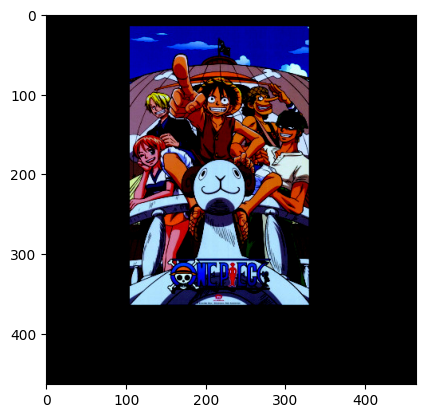

In [3]:
import numpy as np
import pickle
# rand = np.random.randint(100)
rand = 0
import torch
import matplotlib.pyplot as plt

img, rank = pickle.load(open(f'new_test_imgs/{int(rand)}', 'rb'))
# imshow needs the dimensions in a different order
plt.imshow(img.permute(1, 2, 0))
print(rank)

In [4]:
test = DataLoader(animeDataset('new_test_imgs'), 1)

l = 'training/VITh_64_0.01_100_16_8_4_1_49'
li = l.split('_')
batch_size, lr, ne, p, d, attn, layer, epoch  = tuple(li[1:])
batch_size, ne, layer, epoch, p, d, attn = int(batch_size), int(ne), int(layer), int(epoch), int(p), int(d), int(attn)
lr = float(lr)

net = ImageTransformer('VITeval', batch_size, lr, ne, p, d, layer, attn)
model_path = l
state = torch.load(model_path)
net.load_state_dict(state)
net.to('cuda')

evaluate.evaluate(net, test)

0.30991323848533675

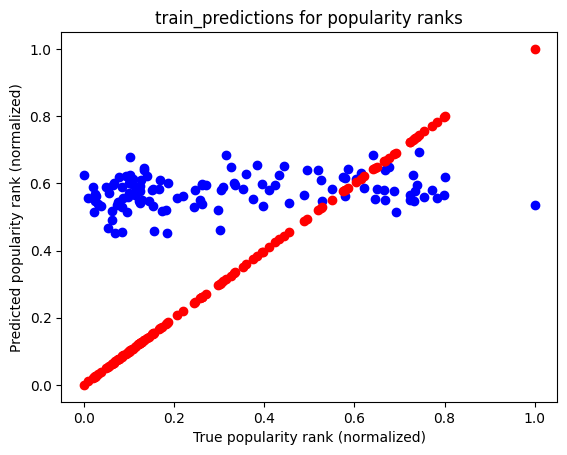

In [5]:
preds = []
labels_list = []
for i, data in enumerate(test, 0):
    inputs, labels = data
    # print(inputs)
    # print(labels)
    pred = net(inputs)
    preds.append(pred.item())
    labels_list.append(labels.item())   
plt.figure(3)
plt.plot(labels_list, preds, 'bo')
plt.plot(labels_list, labels_list, 'ro')
# plt.xlim(0.00, 1.00)
# plt.ylim(-0.00, 1.00)
plt.title("train_predictions for popularity ranks")
plt.xlabel("True popularity rank (normalized)")
plt.ylabel("Predicted popularity rank (normalized)")
plt.savefig('VIT_train')
plt.show()